In [1]:
import pandas as pd

### 1. **엑셀 파일내 시트를 모두 읽기**

In [2]:
path = '/content/기초 11-2_BTS_songs.xlsx'

In [3]:
df_all = pd.read_excel(path, sheet_name=None)

In [4]:
df_all.keys()

dict_keys(['Data', 'Preprocessed', '감성점수추이', 'Exercise', 'FRED_entertainment_employees', 'FRED_unemployment_rate'])

### 2. **엔터테인먼트 종사자 시계열자료 시트를 데이터프레임으로 읽기**
>> #### **날짜와 수자를 time과 실수로 변경하기**

In [5]:
emp = df_all['FRED_entertainment_employees']
emp.head()

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN


In [6]:
emp[:20]

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
5,NaN,NaN
6,CES7071000001,"All Employees, Arts, Entertainment, and Recrea..."
7,NaN,NaN
8,Frequency: Monthly,NaN
9,observation_date,CES7071000001


In [7]:
emp = emp[10:]

In [8]:
emp.head()

,FRED Graph Observations,Unnamed: 1
10,1990-01-01 00:00:00,1139.7
11,1990-02-01 00:00:00,1136.3
12,1990-03-01 00:00:00,1152.8
13,1990-04-01 00:00:00,1138.8
14,1990-05-01 00:00:00,1127.4


In [9]:
emp.columns = ['date', 'number']
emp.head()

,date,number
10,1990-01-01 00:00:00,1139.7
11,1990-02-01 00:00:00,1136.3
12,1990-03-01 00:00:00,1152.8
13,1990-04-01 00:00:00,1138.8
14,1990-05-01 00:00:00,1127.4


In [10]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 10 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    390 non-null    object
 1   number  390 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [11]:
date_format = '%Y.%m.%d'
pd.to_datetime(emp['date'], format=date_format)

10    1990-01-01
11    1990-02-01
12    1990-03-01
13    1990-04-01
14    1990-05-01
         ...    
395   2022-02-01
396   2022-03-01
397   2022-04-01
398   2022-05-01
399   2022-06-01
Name: date, Length: 390, dtype: datetime64[ns]

In [12]:
emp['date'] = pd.to_datetime(emp['date'], format=date_format)

<ipython-input-12-dee39dd231c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp['date'] = pd.to_datetime(emp['date'], format=date_format)


In [13]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 10 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    390 non-null    datetime64[ns]
 1   number  390 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 6.2+ KB


In [14]:
emp['number'] = emp['number'].astype('float64')

<ipython-input-14-840f440fa72b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp['number'] = emp['number'].astype('float64')


In [15]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 10 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    390 non-null    datetime64[ns]
 1   number  390 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 KB


### 3. **실업률 시계열자료 시트를 데이터프레임으로 읽기**
>> #### **날짜와 수자를 time과 실수로 변경하기**

In [16]:
df_all.keys()

dict_keys(['Data', 'Preprocessed', '감성점수추이', 'Exercise', 'FRED_entertainment_employees', 'FRED_unemployment_rate'])

In [ ]:
unemp = df_all['FRED_unemployment_rate']
unemp.head()

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN


In [ ]:
unemp[:20]

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
5,NaN,NaN
6,UNRATE,"Unemployment Rate, Percent, Monthly, Seasonall..."
7,NaN,NaN
8,Frequency: Monthly,NaN
9,observation_date,UNRATE


In [ ]:
unemp = unemp[10:]
unemp.head()

,FRED Graph Observations,Unnamed: 1
10,1948-01-01 00:00:00,3.4
11,1948-02-01 00:00:00,3.8
12,1948-03-01 00:00:00,4
13,1948-04-01 00:00:00,3.9
14,1948-05-01 00:00:00,3.5


In [ ]:
unemp.columns = ['date', 'number']
unemp['date'] = pd.to_datetime(unemp['date'], format=date_format)
unemp['number'] = unemp['number'].astype('float64')

<ipython-input-42-5555dd902456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp['date'] = pd.to_datetime(unemp['date'], format=date_format)
<ipython-input-42-5555dd902456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp['number'] = unemp['number'].astype('float64')


In [ ]:
unemp.head()

,date,number
10,1948-01-01,3.4
11,1948-02-01,3.8
12,1948-03-01,4.0
13,1948-04-01,3.9
14,1948-05-01,3.5


In [ ]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 10 to 903
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    894 non-null    datetime64[ns]
 1   number  894 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.1 KB


### 4. **엔터테인먼트 종사자와 실업률 자료 합치기**

In [ ]:
emp.head()

,date,number
10,1990-01-01,1139.7
11,1990-02-01,1136.3
12,1990-03-01,1152.8
13,1990-04-01,1138.8
14,1990-05-01,1127.4


In [ ]:
emp.shape

(390, 2)

In [ ]:
unemp.head()

,date,number
10,1948-01-01,3.4
11,1948-02-01,3.8
12,1948-03-01,4.0
13,1948-04-01,3.9
14,1948-05-01,3.5


In [ ]:
unemp.shape

(894, 2)

In [ ]:
pd.merge(emp, unemp, on='date')

,date,number_x,number_y
0,1990-01-01,1139.7,5.4
1,1990-02-01,1136.3,5.3
2,1990-03-01,1152.8,5.2
3,1990-04-01,1138.8,5.4
4,1990-05-01,1127.4,5.4
...,...,...,...
385,2022-02-01,2233.7,3.8
386,2022-03-01,2256.6,3.6
387,2022-04-01,2265.1,3.6
388,2022-05-01,2282.4,3.6


In [ ]:
df = pd.merge(emp, unemp, on='date')
df.columns= ['date', 'emp', 'unemp']
df

,date,emp,unemp
0,1990-01-01,1139.7,5.4
1,1990-02-01,1136.3,5.3
2,1990-03-01,1152.8,5.2
3,1990-04-01,1138.8,5.4
4,1990-05-01,1127.4,5.4
...,...,...,...
385,2022-02-01,2233.7,3.8
386,2022-03-01,2256.6,3.6
387,2022-04-01,2265.1,3.6
388,2022-05-01,2282.4,3.6


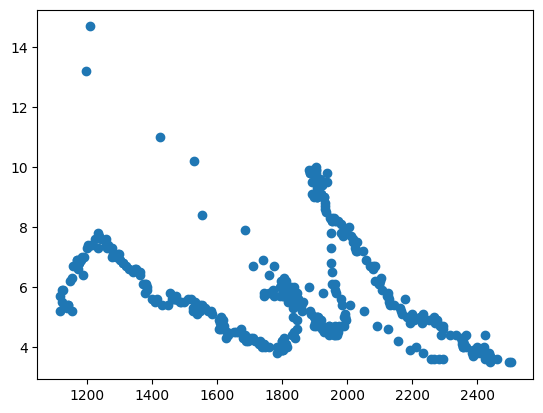

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['emp'], df['unemp'])


>> **엔터테인먼트 종사자수를 설명변수(x)로, 실업률을 응답변수(y)로 하여, 회귀선 시각화결과를 만들어 보세요. 이번 달 엔터테인먼트 종사자 수를 알 때, 실업률을 예측할 수 있을까요?**

In [ ]:
df_all.keys()

dict_keys(['Data', 'Preprocessed', '감성점수추이', 'Exercise', 'FRED_entertainment_employees', 'FRED_unemployment_rate'])

In [ ]:
tf = df_all['감성점수추이']
tf

,release_date,album_title,평균 감성 점수
0,2013.06.12,2 Cool 4 Skool,-4.333333
1,2013.09.11,"O!RUL8,2? (Oh, Are You Late Too?)",-1.333333
2,2014.02.12,Skool Luv Affair,-2.000000
3,2014.05.14,Skool Luv Affair Special Addition,0.000000
4,2014.08.20,DARK & WILD,-3.000000
5,2015.04.29,화양연화 (The Most Beautiful Moment In Life) pt. 1,0.375000
6,2015.11.30,화양연화 (The Most Beautiful Moment In Life) pt. 2,-1.571429
7,2016.05.02,화양연화 (The Most Beautiful Moment In Life) Young...,-3.000000
8,2016.10.10,WINGS,-2.133333
9,2017.02.13,YOU NEVER WALK ALONE,-3.333333


In [ ]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  14 non-null     datetime64[ns]
 1   album_title   14 non-null     object        
 2   평균 감성 점수      14 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
tf['release_date'] = pd.to_datetime(tf['release_date'], format=date_format)

In [ ]:
tf.head()

,release_date,album_title,평균 감성 점수
0,2013-06-12,2 Cool 4 Skool,-4.333333
1,2013-09-11,"O!RUL8,2? (Oh, Are You Late Too?)",-1.333333
2,2014-02-12,Skool Luv Affair,-2.000000
3,2014-05-14,Skool Luv Affair Special Addition,0.000000
4,2014-08-20,DARK & WILD,-3.000000


In [ ]:
df.head()

,date,emp,unemp
0,1990-01-01,1139.7,5.4
1,1990-02-01,1136.3,5.3
2,1990-03-01,1152.8,5.2
3,1990-04-01,1138.8,5.4
4,1990-05-01,1127.4,5.4


In [ ]:
pd.merge(tf, df, left_on = 'release_date', right_on = 'date')

,release_date,album_title,평균 감성 점수,date,emp,unemp


In [ ]:
tf['release_date'].dt.year

0     2013
1     2013
2     2014
3     2014
4     2014
5     2015
6     2015
7     2016
8     2016
9     2017
10    2017
11    2018
12    2018
13    2019
Name: release_date, dtype: int64

In [ ]:
tf['release_date'].dt.month

0      6
1      9
2      2
3      5
4      8
5      4
6     11
7      5
8     10
9      2
10     9
11     5
12     8
13     4
Name: release_date, dtype: int64

In [ ]:
df['ym'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')

In [ ]:
tf['ym'] = pd.to_datetime(tf['release_date']).dt.strftime('%Y-%m')

In [ ]:
data = pd.merge(tf, df, on = 'ym')
data.sample(5)

,release_date,album_title,평균 감성 점수,ym,date,emp,unemp
1,2013-09-11,"O!RUL8,2? (Oh, Are You Late Too?)",-1.333333,2013-09,2013-09-01,2028.8,7.2
7,2016-05-02,화양연화 (The Most Beautiful Moment In Life) Young...,-3.000000,2016-05,2016-05-01,2230.4,4.8
5,2015-04-29,화양연화 (The Most Beautiful Moment In Life) pt. 1,0.375000,2015-04,2015-04-01,2142.1,5.4
0,2013-06-12,2 Cool 4 Skool,-4.333333,2013-06,2013-06-01,2029.4,7.5
6,2015-11-30,화양연화 (The Most Beautiful Moment In Life) pt. 2,-1.571429,2015-11,2015-11-01,2198.6,5.1


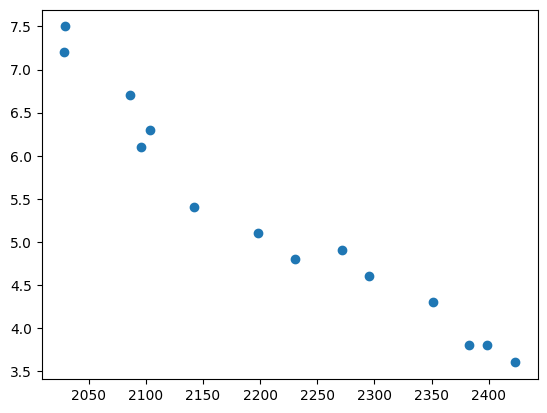

In [ ]:
plt.scatter(data['emp'], data['unemp'])

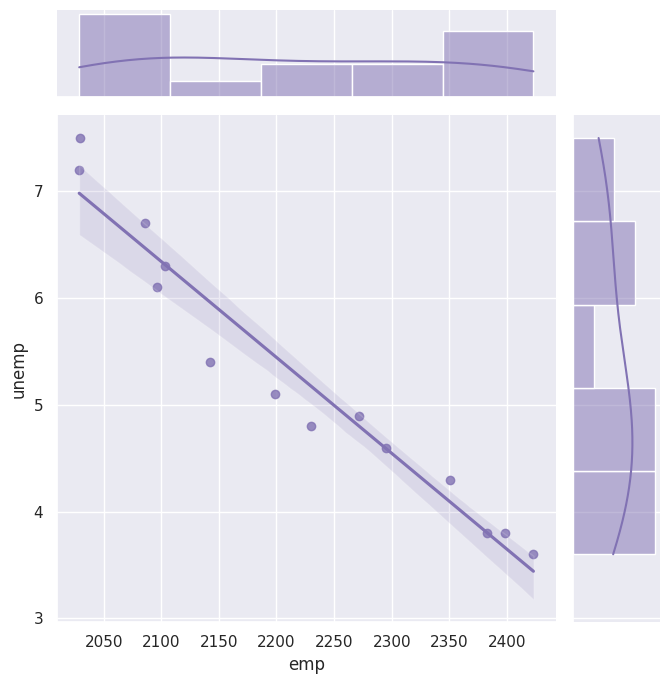

In [ ]:
import seaborn as sns
g = sns.jointplot(x="emp", y="unemp", data=data,
                  kind="reg",
                  color="m", height=7)

In [ ]:
from sklearn.linear_model import LinearRegression
X = data['emp'].values
y = data['unemp'].values
reg = LinearRegression().fit(X, y)

ValueError: ignored

In [ ]:
reg = LinearRegression().fit(X.reshape(-1,1), y)

In [ ]:
reg.score(X.reshape(-1,1), y)

0.9469627625620594

In [ ]:
reg.coef_

array([-0.00898419])

In [ ]:
reg.intercept_

25.209838192822335